In [2]:
from sklearn.model_selection import train_test_split
import glob
import matplotlib.pyplot as plt 
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
import os
from sklearn import metrics
import pandas as pd
import cv2 
import random
from tensorflow.keras import layers
from imutils import paths
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report
import shap
DIM=128 
BS=32

In [3]:
imagePaths = list(paths.list_images('newcommand1/'))
data_cmd = []
labels_cmd = []
id_date_list_cmd = []
# loop over the image paths
for imagePath in imagePaths:
    label = imagePath.split(os.path.sep)[-2]
    image = cv2.imread(imagePath)
    image = cv2.resize(image, (DIM, DIM))
    arr=imagePath.split('_')
    iddate = arr[1]+'-'+arr[2]+'_'+arr[3]
    #if df[df.id_date == iddate].age_at_event.values[0] >= 20:
    if image.sum()!=(DIM*DIM*3*255):
        data_cmd.append(image)
        labels_cmd.append(label)
        id_date_list_cmd.append(iddate)

data_cmd = np.array(data_cmd, dtype="float") / 255.0
le = LabelEncoder()
labels_cmd = le.fit_transform(labels_cmd)
labels_cmd = to_categorical(labels_cmd, 2)

In [4]:
labels_cmd

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [5]:
#load labels
df1=pd.read_csv('fhs_csk/20200615/metadata/rekey_revalue_(2292)_[2302]_2020061748_first_dct_replace_metadata_20200615.csv') 
df2=pd.read_csv('fhs_csk/20200615/metadata/rekey_revalue_(1758)_[1814]_2020061751_second_dct_replace_metadata_20200615.csv') 
df_s = pd.concat([df1,df2])

In [7]:
dfcmd = df_s[df_s.id_date.isin(id_date_list_cmd)]

In [8]:
sum(dfcmd[dfcmd.age_at_event >= 60].diagnosis>0 )

158

In [9]:
sum(labels_cmd[:,1])

3261.0

In [11]:
imagePaths = list(paths.list_images('newcopy1/'))
data_cop = []
labels_cop = []
id_date_list_cop = []
# loop over the image paths
for imagePath in imagePaths:
    label = imagePath.split(os.path.sep)[-2]
    image = cv2.imread(imagePath)
    image = cv2.resize(image, (DIM, DIM))
    arr=imagePath.split('_')
    iddate = arr[1]+'-'+arr[2]+'_'+arr[3]
    #if df[df.id_date == iddate].age_at_event.values[0] >= 70:
    if image.sum()!=(DIM*DIM*3*255):
        data_cop.append(image)
        labels_cop.append(label)
        id_date_list_cop.append(iddate)

data_cop = np.array(data_cop, dtype="float") / 255.0
le = LabelEncoder()
labels_cop = le.fit_transform(labels_cop)
labels_cop = to_categorical(labels_cop, 2)

In [12]:
n_idx = [idx for idx, val in enumerate(labels_cmd[:,0]) if val==0] 
d_idx = [idx for idx, val in enumerate(labels_cmd[:,0]) if val==1] 
n_id=np.array(id_date_list_cmd)[n_idx]
d_id=np.array(id_date_list_cmd)[d_idx]

if len(n_id)>=len(d_id):
    undersamples=len(d_id)
    id_list = [*n_id[0:undersamples],*d_id]
else:
    undersamples=len(n_id)
    id_list = [*d_id[0:undersamples],*n_id]
id_list = [*d_id,*n_id]   
random.seed(41)
random.shuffle(id_list)

id_label = []
for i in id_list:
    id_label.append(list(labels_cmd[id_date_list_cmd.index(i),:]))
id_label = np.array(id_label)

In [13]:
from sklearn.model_selection import StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
train_id = []
test_id = []
for train_index, test_index in sss.split(range(len(labels_cmd)), labels_cmd[:,0]):
    train_id.append(train_index)
    test_id.append(test_index)

In [14]:
from sklearn.model_selection import StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
train_id = []
test_id = []
for train_index, test_index in sss.split(range(len(id_label)), id_label[:,0]):
    train_id.append(train_index)
    test_id.append(test_index)

In [143]:
df = pd.concat([df1,df2])
test_id_reduced = np.copy(test_id)
test_id_reduced = [list(test_id_reduced[i]) for i in range(5)]
for idd in id_date_list_cmd:
    if df[df.id_date == idd].age_at_event.values[0]<60:
        idx = id_date_list_cmd.index(idd)
        for i in range(5):
            if idx in test_id_reduced[i]:
                test_id_reduced[i].remove(idx)

In [144]:
test_id_reduced = [np.array(test_id_reduced[i]) for i in range(5)]

In [145]:
test_id_reduced[0]

array([ 360, 1385, 2355, 1909, 2925, 1801,  451, 1196, 1433,  355, 2602,
       1512, 3230,  146, 2365, 1873,  861, 3354, 1009, 3092, 2969, 2014,
          3, 1280, 1654, 1114,  798, 2413, 2340, 2952, 3123,  192,  662,
       1954,  536,  613, 3237, 1111,  411, 1979, 1700, 2207, 3346, 3337,
        695, 3322, 2358, 2931, 2228, 1843, 1440,  119, 1687,  766, 2226,
        898, 1747,  422,  311, 1999, 1677, 3084, 2726,  804, 1186,  654,
       2526, 1917, 1926, 1253, 1052,   64, 1985, 1011,  783,  261, 2436,
        704, 2546,  554, 2089,  374, 1178, 3069,  358, 1138,  553, 1240,
       2762, 2932, 1470, 2042, 3262, 3245, 2682, 1574,  247, 1597, 2818,
       2299, 1548, 3066, 1223, 2660, 1129,   30, 2243, 3126, 2886, 2717,
       3340,  112,  924,  886,  857, 1525, 1678, 1209, 1452,  576, 1008,
       1305,  927, 2955, 1981, 1133, 1217, 2590, 2053,  991, 2318, 3257,
       2543, 3306, 2485, 1853, 1845,  403, 2077,  682,  420,  953,  673,
       3342, 2356, 2214,  753, 2482, 2695, 1425, 33

In [75]:
aug = ImageDataGenerator(
		rotation_range=10,
		zoom_range=0.15,
		width_shift_range=0.1,
		height_shift_range=0.1,
		shear_range=0.15,
		fill_mode="nearest")

In [2]:
IMG_SHAPE = (DIM, DIM, 3)

# Create the base model from the pre-trained model
base_model_cmd = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,include_top=False,weights='imagenet')
#base_model_cmd = tf.keras.applications.DenseNet121(input_shape=IMG_SHAPE,include_top=False,weights='imagenet')

In [77]:
#Training
for m in range(5):
    X_traincmd = data_cmd[train_id[m]]
    y_traincmd =id_label[train_id[m]]
    X_testcmd =data_cmd[test_id[m]]
    y_testcmd =id_label[test_id[m]]

    base_model_cmd.trainable = False
    model_cmd = tf.keras.Sequential([
      base_model_cmd,
      layers.GlobalAveragePooling2D(),
      layers.Dense(2, activation='softmax')
    ])

    optimizer=tf.keras.optimizers.Adam(learning_rate=3e-4)#3e-4
    model_cmd.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy','binary_crossentropy',tf.keras.metrics.AUC()])

    model_cmd.fit(x=aug.flow(X_traincmd, y_traincmd, batch_size=BS),
            #validation_data=(X_testcmd, y_testcmd),
            steps_per_epoch=len(X_traincmd) // BS,
            epochs=200)
    print("#{}".format(i))

    model_cmd.save("model_balanced{}".format(m))

Epoch 1/200
7/7 [==============================] - 1s 170ms/step - loss: 0.7405 - accuracy: 0.5446 - binary_crossentropy: 0.7405 - auc_2: 0.5767
Epoch 2/200
7/7 [==============================] - 1s 160ms/step - loss: 0.7908 - accuracy: 0.4834 - binary_crossentropy: 0.7908 - auc_2: 0.5029
Epoch 3/200
7/7 [==============================] - 1s 165ms/step - loss: 0.7305 - accuracy: 0.5166 - binary_crossentropy: 0.7305 - auc_2: 0.5368
Epoch 4/200
7/7 [==============================] - 1s 171ms/step - loss: 0.7297 - accuracy: 0.5213 - binary_crossentropy: 0.7297 - auc_2: 0.5495
Epoch 5/200
7/7 [==============================] - 1s 186ms/step - loss: 0.7280 - accuracy: 0.5498 - binary_crossentropy: 0.7280 - auc_2: 0.5504
Epoch 6/200
7/7 [==============================] - 1s 177ms/step - loss: 0.7269 - accuracy: 0.5261 - binary_crossentropy: 0.7269 - auc_2: 0.5232
Epoch 7/200
7/7 [==============================] - 1s 202ms/step - loss: 0.7295 - accuracy: 0.5403 - binary_crossentropy: 0.7295 -

7/7 [==============================] - 1s 178ms/step - loss: 0.5532 - accuracy: 0.7156 - binary_crossentropy: 0.5532 - auc_2: 0.8038
Epoch 114/200
7/7 [==============================] - 1s 178ms/step - loss: 0.5622 - accuracy: 0.6777 - binary_crossentropy: 0.5622 - auc_2: 0.7930
Epoch 115/200
7/7 [==============================] - 1s 170ms/step - loss: 0.5721 - accuracy: 0.7346 - binary_crossentropy: 0.5721 - auc_2: 0.7775
Epoch 116/200
7/7 [==============================] - 1s 168ms/step - loss: 0.5393 - accuracy: 0.7536 - binary_crossentropy: 0.5393 - auc_2: 0.8214
Epoch 117/200
7/7 [==============================] - 1s 172ms/step - loss: 0.5438 - accuracy: 0.7204 - binary_crossentropy: 0.5438 - auc_2: 0.8229
Epoch 118/200
7/7 [==============================] - 1s 184ms/step - loss: 0.5434 - accuracy: 0.7488 - binary_crossentropy: 0.5434 - auc_2: 0.8248
Epoch 119/200
7/7 [==============================] - 1s 179ms/step - loss: 0.5647 - accuracy: 0.6730 - binary_crossentropy: 0.5647 -

7/7 [==============================] - 1s 170ms/step - loss: 0.7167 - accuracy: 0.5213 - binary_crossentropy: 0.7167 - auc_3: 0.5032
Epoch 19/200
7/7 [==============================] - 1s 170ms/step - loss: 0.6706 - accuracy: 0.5355 - binary_crossentropy: 0.6706 - auc_3: 0.5982
Epoch 20/200
7/7 [==============================] - 1s 184ms/step - loss: 0.6676 - accuracy: 0.5687 - binary_crossentropy: 0.6676 - auc_3: 0.6160
Epoch 21/200
7/7 [==============================] - 1s 171ms/step - loss: 0.6787 - accuracy: 0.5735 - binary_crossentropy: 0.6787 - auc_3: 0.6002
Epoch 22/200
7/7 [==============================] - 1s 170ms/step - loss: 0.6773 - accuracy: 0.5450 - binary_crossentropy: 0.6773 - auc_3: 0.5838
Epoch 23/200
7/7 [==============================] - 1s 170ms/step - loss: 0.6787 - accuracy: 0.5403 - binary_crossentropy: 0.6787 - auc_3: 0.5791
Epoch 24/200
7/7 [==============================] - 1s 165ms/step - loss: 0.6778 - accuracy: 0.5640 - binary_crossentropy: 0.6778 - auc_3

Epoch 130/200
7/7 [==============================] - 1s 172ms/step - loss: 0.5387 - accuracy: 0.7204 - binary_crossentropy: 0.5387 - auc_3: 0.8149
Epoch 131/200
7/7 [==============================] - 1s 182ms/step - loss: 0.5590 - accuracy: 0.6964 - binary_crossentropy: 0.5590 - auc_3: 0.7805
Epoch 132/200
7/7 [==============================] - 1s 180ms/step - loss: 0.5645 - accuracy: 0.7232 - binary_crossentropy: 0.5645 - auc_3: 0.7839
Epoch 133/200
7/7 [==============================] - 1s 183ms/step - loss: 0.5278 - accuracy: 0.7346 - binary_crossentropy: 0.5278 - auc_3: 0.8432
Epoch 134/200
7/7 [==============================] - 1s 172ms/step - loss: 0.5430 - accuracy: 0.7251 - binary_crossentropy: 0.5430 - auc_3: 0.8066
Epoch 135/200
7/7 [==============================] - 1s 173ms/step - loss: 0.5481 - accuracy: 0.6919 - binary_crossentropy: 0.5481 - auc_3: 0.7944
Epoch 136/200
7/7 [==============================] - 1s 171ms/step - loss: 0.5105 - accuracy: 0.7820 - binary_crossent

7/7 [==============================] - 1s 190ms/step - loss: 0.6442 - accuracy: 0.5924 - binary_crossentropy: 0.6442 - auc_4: 0.6547
Epoch 41/200
7/7 [==============================] - 1s 178ms/step - loss: 0.6292 - accuracy: 0.6445 - binary_crossentropy: 0.6292 - auc_4: 0.6804
Epoch 42/200
7/7 [==============================] - 1s 174ms/step - loss: 0.6313 - accuracy: 0.6114 - binary_crossentropy: 0.6313 - auc_4: 0.6730
Epoch 43/200
7/7 [==============================] - 2s 242ms/step - loss: 0.6353 - accuracy: 0.5982 - binary_crossentropy: 0.6353 - auc_4: 0.6751
Epoch 44/200
7/7 [==============================] - 2s 220ms/step - loss: 0.5871 - accuracy: 0.6777 - binary_crossentropy: 0.5871 - auc_4: 0.7609
Epoch 45/200
7/7 [==============================] - 1s 186ms/step - loss: 0.6352 - accuracy: 0.6209 - binary_crossentropy: 0.6352 - auc_4: 0.6771
Epoch 46/200
7/7 [==============================] - 1s 183ms/step - loss: 0.5954 - accuracy: 0.6540 - binary_crossentropy: 0.5954 - auc_4

7/7 [==============================] - 1s 171ms/step - loss: 0.5264 - accuracy: 0.7062 - binary_crossentropy: 0.5264 - auc_4: 0.8127
Epoch 152/200
7/7 [==============================] - 1s 175ms/step - loss: 0.5190 - accuracy: 0.7299 - binary_crossentropy: 0.5190 - auc_4: 0.8301
Epoch 153/200
7/7 [==============================] - 1s 171ms/step - loss: 0.5165 - accuracy: 0.7441 - binary_crossentropy: 0.5165 - auc_4: 0.8394
Epoch 154/200
7/7 [==============================] - 1s 172ms/step - loss: 0.5321 - accuracy: 0.7062 - binary_crossentropy: 0.5321 - auc_4: 0.8093
Epoch 155/200
7/7 [==============================] - 1s 185ms/step - loss: 0.5146 - accuracy: 0.7188 - binary_crossentropy: 0.5146 - auc_4: 0.8306
Epoch 156/200
7/7 [==============================] - 1s 181ms/step - loss: 0.5105 - accuracy: 0.7545 - binary_crossentropy: 0.5105 - auc_4: 0.8358
Epoch 157/200
7/7 [==============================] - 1s 176ms/step - loss: 0.5098 - accuracy: 0.7962 - binary_crossentropy: 0.5098 -

7/7 [==============================] - 1s 174ms/step - loss: 0.5851 - accuracy: 0.7488 - binary_crossentropy: 0.5851 - auc_5: 0.7823
Epoch 63/200
7/7 [==============================] - 1s 167ms/step - loss: 0.6084 - accuracy: 0.6682 - binary_crossentropy: 0.6084 - auc_5: 0.7209
Epoch 64/200
7/7 [==============================] - 1s 171ms/step - loss: 0.6017 - accuracy: 0.6777 - binary_crossentropy: 0.6017 - auc_5: 0.7306
Epoch 65/200
7/7 [==============================] - 1s 171ms/step - loss: 0.5842 - accuracy: 0.6825 - binary_crossentropy: 0.5842 - auc_5: 0.7659
Epoch 66/200
7/7 [==============================] - 1s 200ms/step - loss: 0.6055 - accuracy: 0.6562 - binary_crossentropy: 0.6055 - auc_5: 0.7282
Epoch 67/200
7/7 [==============================] - 2s 218ms/step - loss: 0.5747 - accuracy: 0.7232 - binary_crossentropy: 0.5747 - auc_5: 0.7809
Epoch 68/200
7/7 [==============================] - 1s 200ms/step - loss: 0.6046 - accuracy: 0.6209 - binary_crossentropy: 0.6046 - auc_5

7/7 [==============================] - 1s 172ms/step - loss: 0.5774 - accuracy: 0.6825 - binary_crossentropy: 0.5774 - auc_5: 0.7629
Epoch 119/200
7/7 [==============================] - 1s 175ms/step - loss: 0.5706 - accuracy: 0.6777 - binary_crossentropy: 0.5706 - auc_5: 0.7591
Epoch 120/200
7/7 [==============================] - 1s 177ms/step - loss: 0.5478 - accuracy: 0.7393 - binary_crossentropy: 0.5478 - auc_5: 0.8039
Epoch 121/200
7/7 [==============================] - 1s 193ms/step - loss: 0.5224 - accuracy: 0.7634 - binary_crossentropy: 0.5224 - auc_5: 0.8551
Epoch 122/200
7/7 [==============================] - 1s 180ms/step - loss: 0.5478 - accuracy: 0.7156 - binary_crossentropy: 0.5478 - auc_5: 0.8073
Epoch 123/200
7/7 [==============================] - 1s 176ms/step - loss: 0.5407 - accuracy: 0.7346 - binary_crossentropy: 0.5407 - auc_5: 0.8196
Epoch 124/200
7/7 [==============================] - 1s 190ms/step - loss: 0.5388 - accuracy: 0.7299 - binary_crossentropy: 0.5388 -

7/7 [==============================] - 1s 177ms/step - loss: 0.6391 - accuracy: 0.6540 - binary_crossentropy: 0.6391 - auc_6: 0.6828
Epoch 29/200
7/7 [==============================] - 1s 173ms/step - loss: 0.6559 - accuracy: 0.6066 - binary_crossentropy: 0.6559 - auc_6: 0.6487
Epoch 30/200
7/7 [==============================] - 1s 173ms/step - loss: 0.6606 - accuracy: 0.5498 - binary_crossentropy: 0.6606 - auc_6: 0.6215
Epoch 31/200
7/7 [==============================] - 1s 178ms/step - loss: 0.6454 - accuracy: 0.6019 - binary_crossentropy: 0.6454 - auc_6: 0.6567
Epoch 32/200
7/7 [==============================] - 1s 182ms/step - loss: 0.6355 - accuracy: 0.5877 - binary_crossentropy: 0.6355 - auc_6: 0.6715
Epoch 33/200
7/7 [==============================] - 1s 188ms/step - loss: 0.6267 - accuracy: 0.6019 - binary_crossentropy: 0.6267 - auc_6: 0.6861
Epoch 34/200
7/7 [==============================] - 1s 184ms/step - loss: 0.6296 - accuracy: 0.6161 - binary_crossentropy: 0.6296 - auc_6

7/7 [==============================] - 1s 187ms/step - loss: 0.5309 - accuracy: 0.7204 - binary_crossentropy: 0.5309 - auc_6: 0.8139
Epoch 140/200
7/7 [==============================] - 1s 191ms/step - loss: 0.5400 - accuracy: 0.7411 - binary_crossentropy: 0.5400 - auc_6: 0.8179
Epoch 141/200
7/7 [==============================] - 1s 191ms/step - loss: 0.5417 - accuracy: 0.7188 - binary_crossentropy: 0.5417 - auc_6: 0.8026
Epoch 142/200
7/7 [==============================] - 1s 189ms/step - loss: 0.5456 - accuracy: 0.7299 - binary_crossentropy: 0.5456 - auc_6: 0.8003
Epoch 143/200
7/7 [==============================] - 1s 176ms/step - loss: 0.5326 - accuracy: 0.7204 - binary_crossentropy: 0.5326 - auc_6: 0.8223
Epoch 144/200
7/7 [==============================] - 1s 191ms/step - loss: 0.5229 - accuracy: 0.7366 - binary_crossentropy: 0.5229 - auc_6: 0.8375
Epoch 145/200
7/7 [==============================] - 1s 185ms/step - loss: 0.5313 - accuracy: 0.6919 - binary_crossentropy: 0.5313 -

In [15]:
from tensorflow import keras
from sklearn.metrics import classification_report

In [146]:
for i in range(5):
    model_cmd = keras.models.load_model("model_cmd{}".format(i))
    y_testcmd =labels_cmd[test_id_reduced[i]]
    y_pred=model_cmd.predict(data_cmd[test_id_reduced[i]])
    y_pred_label=((y_pred[:,0]>0.5)*1.0).flatten()
    print(metrics.classification_report(y_testcmd[:,1], y_pred_label))
    auc=metrics.roc_auc_score(y_testcmd.astype(int), y_pred)
    print('auc_model{}: '.format(i)+str(auc))

              precision    recall  f1-score   support

         0.0       0.04      0.47      0.08        32
         1.0       0.79      0.17      0.27       385

    accuracy                           0.19       417
   macro avg       0.42      0.32      0.18       417
weighted avg       0.73      0.19      0.26       417

auc_model0: 0.7217532467532468
              precision    recall  f1-score   support

         0.0       0.06      0.69      0.11        32
         1.0       0.81      0.11      0.20       377

    accuracy                           0.16       409
   macro avg       0.43      0.40      0.15       409
weighted avg       0.75      0.16      0.19       409

auc_model1: 0.6957062334217506
              precision    recall  f1-score   support

         0.0       0.04      0.38      0.07        32
         1.0       0.78      0.19      0.30       386

    accuracy                           0.20       418
   macro avg       0.41      0.28      0.19       418
weighted avg

In [3]:
tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,include_top=False,weights='imagenet').summary()

Model: "mobilenetv2_1.00_128"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 129, 129, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 64, 64, 32)   864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 64, 64, 32)   128         Conv1[0][0]                      
_______________________________________________________________________________

In [23]:
base_model_cmd.trainable = False
model_cmd = tf.keras.Sequential([
  base_model_cmd,
  layers.GlobalAveragePooling2D(),
  layers.Dense(2, activation='softmax')
])

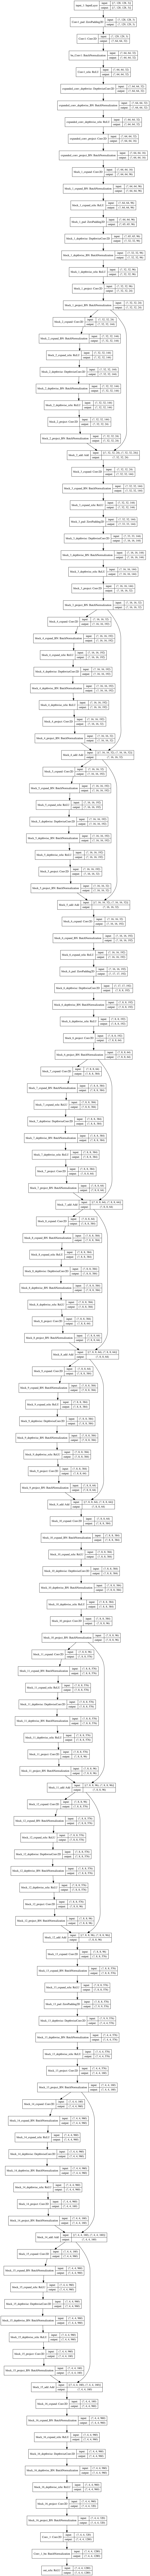

In [192]:
tf.keras.utils.plot_model(base_model_cmd, to_file='model2.png',show_shapes=True,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,)

In [4]:
tf.keras.applications.MobileNetV2(weights='imagenet').summary()

14540800/14536120 [==============================] - 1s 0us/step
Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
______________

In [16]:
#load labels
df_edu=pd.read_csv('add_to_dict_(3452)_[4116]_2020082624_anon_dcdt_dr_demographics_mmse.csv')

In [9]:
for m in range(5):
    print(f"Fold {m+1}")
    del df
    df = pd.concat([df1,df2])
    df["diagnosis"] = df["diagnosis"].apply(lambda a: int(float(a)>0))
    df["cnn_command"] =np.NaN
    df["cnn_copy"] =np.NaN
    df=df[['id_date','age_at_event','cnn_command','cnn_copy','diagnosis']]
    cnn_command_list = keras.models.load_model("model_cmd{}".format(m)).predict(data_cmd)
    cnn_copy_list = keras.models.load_model("model_cmd{}".format(m)).predict(data_cop)
    for i in range(len(data_cmd)):
        id_date=id_date_list_cmd[i]
        cnn_command = cnn_command_list[i][0]
        df.loc[df.id_date == id_date, 'cnn_command'] = cnn_command
    for i in range(len(data_cop)):
        id_date=id_date_list_cop[i]
        cnn_copy = cnn_copy_list[i][0]
        df.loc[df.id_date == id_date, 'cnn_copy'] = cnn_copy
        
        
    df['cnn_copy'] = df['cnn_copy'].fillna(df['cnn_copy'].mean())
    df.to_pickle("df_f{}".format(m))

Fold 1
Fold 2
Fold 3
Fold 4
Fold 5


In [17]:
import warnings
warnings.filterwarnings('ignore') 
import pickle5 as pickle

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, matthews_corrcoef, f1_score
auc_avg = []
acc_avg = []
f1_avg = []
mcc_avg = []
sens = []
spes = []
fprs = []
tprs = []
coeff = []
for m in range(5):
    df = pd.read_pickle(f"df_f{m}") 
    df = df.dropna()
    #df = df[df.age_at_event >= 60]
    df.fillna((df.mean()), inplace=True)
    df['edu'] = np.nan
    #df['sex'] = np.nan
    #df['apoe'] = np.nan
    #df['race1'] = 'np.nan'
    for i, row in df.iterrows():
        df.at[i,'edu'] = df_edu[df_edu['id_date']==row['id_date']].education.values[0]
        #df.at[i,'sex'] = df_s[df_s['id_date']==row['id_date']].sex.values[0]
        #df.at[i,'apoe'] = df_s[df_s['id_date']==row['id_date']].apoe.values[0]
        #df.at[i,'race1'] = df_s[df_s['id_date']==row['id_date']].race1.values[0]
        
    df['edu'].replace(np.nan,3.0,inplace=True)
    #df['sex'].replace(np.nan,2,inplace=True)
    #df['apoe'].replace(np.nan,33,inplace=True)
    #df['race1'].replace('np.nan','white',inplace=True)
    #df['race1'] = df['race1'].replace(['am in', 'paci','more1', 'unkno'],'other')
    df = pd.get_dummies(df, columns=['edu'])
    #df = pd.get_dummies(df, columns=['apoe'])
    #df = pd.get_dummies(df, columns=['sex'])
    #df = pd.get_dummies(df, columns=['race1'])
    df['age_at_event'] = df['age_at_event'].apply(lambda a: a/df['age_at_event'].std() - df['age_at_event'].mean()/df['age_at_event'].std())
    df['cnn_command'] = df['cnn_command'].apply(lambda a: a/df['cnn_command'].std() - df['cnn_command'].mean()/df['cnn_command'].std())
    df['cnn_copy'] = df['cnn_copy'].apply(lambda a: a/df['cnn_copy'].std() - df['cnn_copy'].mean()/df['cnn_copy'].std())


    test=df[df['id_date'].isin(np.array(id_date_list_cmd)[test_id[m]])]
    train=df[df['id_date'].isin(np.array(id_date_list_cmd)[train_id[m]])]
    y_train=train.diagnosis
    x_train=train.drop(columns=["diagnosis","id_date"])
    #x_train=np.array(train[['cnn_command','age_at_event']]).reshape(-1, 2)
    y_test=test.diagnosis
    x_test=test.drop(columns=["diagnosis","id_date"])
    #x_test=np.array(test[['cnn_command','age_at_event']]).reshape(-1, 2)

    model_log = LogisticRegression(solver='liblinear', random_state=0)
    model_log.fit(x_train, y_train)
    
    filename = f'regression_f{m}.sav'
    pickle.dump(model_log, open(filename, 'wb'))
    
    y_pred=model_log.predict_proba(np.asarray(x_test))
    fpr, tpr, thresholds = metrics.roc_curve(np.array(y_test), np.array(y_pred[:,1]))
    fprs.append(fpr)
    tprs.append(tpr)
    auc=metrics.auc(fpr, tpr)
    auc_avg.append(auc)
    acc_avg.append(np.max([metrics.accuracy_score(np.asarray(y_test), (1*(np.array(y_pred[:,1])>th)).tolist()) for th in thresholds]))
    mcc_avg.append(np.max([matthews_corrcoef(np.asarray(y_test), (1*(np.array(y_pred[:,1])>th)).tolist()) for th in thresholds]))
    f1score = np.max([f1_score(np.asarray(y_test), (1*(np.array(y_pred[:,1])>th)).tolist(), average='weighted') for th in thresholds])
    f1_avg.append(f1score)
    print('auc_model{}: '.format(m)+str(auc))

    gmeans = np.sqrt(tpr * (1-fpr))
    ix = np.argmax(gmeans)
    threshold = thresholds[ix]
    print(metrics.classification_report(np.asarray(y_test), np.array(y_pred[:,1])>threshold))
    tn, fp, fn, tp = confusion_matrix(np.asarray(y_test), np.array(y_pred[:,1])>threshold).ravel()
    sp = tn / (tn+fp)
    sen = tp / (tp+fn)
    print(f"Specificity = {sp}")
    print(f"Sensetivity = {sen}")
    sens.append(sen)
    spes.append(sp)
    coeff.append(model_log.coef_[0])

    
    del df

In [199]:
train[['age_at_event','cnn_command']]

,age_at_event,cnn_command
1,2.496103,2.900813
2,2.423259,3.080627
5,2.350416,3.112032
15,0.456490,-0.518405
17,-0.053413,-0.758482
...,...,...
1807,1.549140,0.853946
1808,-1.291749,-0.046548
1809,-0.417629,-0.220512
1810,0.602177,-0.146878


In [54]:
df = pd.read_pickle(f"df_f{0}") 
df['edu'] = np.nan
for i, row in df.iterrows():
    df.at[i,'edu'] = df_edu[df_edu['id_date']==row['id_date']].education.values[0]

In [163]:
df

,id_date,age_at_event,cnn_command,cnn_copy,diagnosis,edu_0.0,edu_1.0,edu_2.0,edu_3.0
0,0-1503_20150601,2.673201,NaN,-1.998401e-15,0,1,0,0,0
1,0-1951_20140911,2.452402,2.578360,1.258437e+00,0,0,0,0,1
2,0-3766_20151118,2.378803,2.719674,3.736934e+00,0,1,0,0,0
3,0-4437_20120613,2.231604,NaN,-1.998401e-15,1,0,1,0,0
4,0-4437_20150610,2.452402,NaN,-1.998401e-15,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...
1809,72-2318_20170713,-0.491575,0.092456,1.469008e+00,0,0,0,1,0
1810,72-2326_20180328,0.538817,-0.197729,-3.055050e-01,0,0,0,0,1
1811,72-2334_20180413,-1.963563,-0.926081,-1.083334e+00,0,0,0,1,0
1812,72-2357_20160225,0.980414,2.237089,-1.474866e-01,1,0,0,0,1


In [20]:
print(f"AUC : {np.mean(auc_avg):.3f} ({np.std(auc_avg):.3f})")
print(f"Accuracy : {np.mean(acc_avg):.3f} ({np.std(acc_avg):.3f})")
print(f"MCC : {np.mean(mcc_avg):.3f} ({np.std(mcc_avg):.3f})")
print(f"F1score : {np.mean(f1_avg):.3f} ({np.std(f1_avg):.3f})")
print(f"Sensetivity : {np.mean(sens):.3f} ({np.std(sens):.3f})")
print(f"Specificity : {np.mean(spes):.3f} ({np.std(spes):.3f})")

AUC : 0.866 (0.020)
Accuracy : 0.927 (0.002)
MCC : 0.382 (0.038)
F1score : 0.913 (0.006)
Sensetivity : 0.850 (0.036)
Specificity : 0.761 (0.032)


In [187]:
print(f"AUC : {np.mean(auc_avg):.3f} ({np.std(auc_avg):.3f})")
print(f"Accuracy : {np.mean(acc_avg):.3f} ({np.std(acc_avg):.3f})")
print(f"MCC : {np.mean(mcc_avg):.3f} ({np.std(mcc_avg):.3f})")
print(f"F1score : {np.mean(f1_avg):.3f} ({np.std(f1_avg):.3f})")
print(f"Sensetivity : {np.mean(sens):.3f} ({np.std(sens):.3f})")
print(f"Specificity : {np.mean(spes):.3f} ({np.std(spes):.3f})")

AUC : 0.817 (0.020)
Accuracy : 0.924 (0.002)
MCC : 0.324 (0.045)
F1score : 0.901 (0.007)
Sensetivity : 0.675 (0.102)
Specificity : 0.785 (0.087)


In [18]:
avgl = np.zeros(len(coeff[0]))
for i, lists in enumerate(coeff):
    avgl = avgl + lists
avgl = avgl/(i+1)

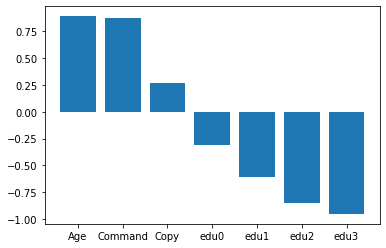

In [19]:
from matplotlib import pyplot
pyplot.bar(["Age","Command","Copy",'edu0','edu1','edu2','edu3'], avgl)
pyplot.xticks(rotation=0)
#pyplot.savefig("avginterp")
pyplot.show()

In [26]:
[coeff[j][6] for j in range(5)]

[-1.032924509306368,
 -1.000020989001827,
 -0.8645636504172285,
 -0.9032888004452632,
 -0.9610499498999153]

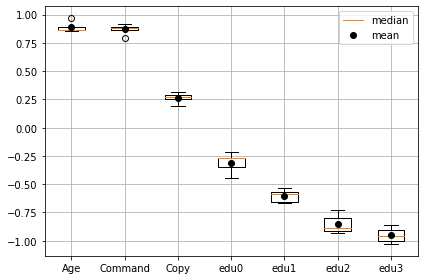

In [42]:
nat = []
for i in range(7):
    nat.append([coeff[j][i] for j in range(5)])
fig = plt.figure()
#fig.suptitle('AUC of (normal, MCI) vs dementia')
ax = fig.add_subplot(111)
bp = plt.boxplot(nat,vert=True,showmeans=True,showfliers=True,whis=1.5,meanprops={"marker":"o","markerfacecolor":"black",
                                                                      "markeredgecolor":"black"})
ax.set_xticklabels(['Age','Command','Copy','edu0','edu1','edu2','edu3'],)
#plt.yticks(rotation=75)
plt.legend([bp['medians'][0], bp['means'][0]], ['median', 'mean'])
plt.grid()
#plt.xlabel('AUC')
plt.tight_layout()
plt.savefig('avginterpedu-boxplot.png')
plt.show()

In [ ]:
for i in range(5):
    del df
    df = df_all[m]
    df = df[df.age_at_event >= 70]
    test=df[df['id_date'].isin(np.array(id_date_list_cmd)[test_id[m]])]
    train=df[df['id_date'].isin(np.array(id_date_list_cmd)[train_id[m]])]
    y_testcmd = test.diagnosis
    y_pred=test.cnn_command
    y_pred_label=((y_pred>0.5)*1.0).flatten()
    print(metrics.classification_report(y_testcmd, y_pred_label))
    auc=metrics.roc_auc_score(y_testcmd.astype(int), y_pred)
    print('auc_model{}: '.format(i)+str(auc))

In [111]:
df = pd.concat([df1,df2])

In [113]:
df['edu'] = np.nan
for i, row in df.iterrows():
    df.at[i,'edu'] = df_edu[df_edu['id_date']==row['id_date']].education.values[0]

In [121]:
len(df[df.edu<0])

0

In [122]:
pd.get_dummies(df, columns=['edu'])

,idtype,id,date,id_date,outpath,age_at_event,race1,sex,apoe,diagnosis,...,ad_nincds_adrda,ad_nincds_adrda_classification,ad_nincds_adrda_subtype,_is_default,prev_event_date,prev_event_diff,edu_0.0,edu_1.0,edu_2.0,edu_3.0
0,0,1503,20150601,0-1503_20150601,/restricted/projectnb/noc-brain/fhs_data/digit...,100,white,2,33.0,-1.0,...,0.0,NaN,NaN,False,NaN,NaN,1,0,0,0
1,0,1951,20140911,0-1951_20140911,/restricted/projectnb/noc-brain/fhs_data/digit...,97,white,2,33.0,0.0,...,NaN,NaN,NaN,True,NaN,NaN,0,0,0,1
2,0,3766,20151118,0-3766_20151118,/restricted/projectnb/noc-brain/fhs_data/digit...,96,white,2,34.0,0.0,...,NaN,NaN,NaN,True,NaN,NaN,1,0,0,0
3,0,4437,20120613,0-4437_20120613,/restricted/projectnb/noc-brain/fhs_data/digit...,94,white,2,23.0,0.5,...,1.0,1.0,NaN,False,NaN,NaN,0,1,0,0
4,0,4437,20150610,0-4437_20150610,/restricted/projectnb/noc-brain/fhs_data/digit...,97,white,2,23.0,0.5,...,1.0,1.0,NaN,False,NaN,NaN,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1809,72,2318,20170713,72-2318_20170713,/restricted/projectnb/noc-brain/fhs_data/digit...,57,paci,1,33.0,0.0,...,NaN,NaN,NaN,True,NaN,NaN,0,0,1,0
1810,72,2326,20180328,72-2326_20180328,/restricted/projectnb/noc-brain/fhs_data/digit...,71,lack,2,33.0,0.0,...,NaN,NaN,NaN,True,NaN,NaN,0,0,0,1
1811,72,2334,20180413,72-2334_20180413,/restricted/projectnb/noc-brain/fhs_data/digit...,37,hispa,2,33.0,0.0,...,NaN,NaN,NaN,True,NaN,NaN,0,0,1,0
1812,72,2357,20160225,72-2357_20160225,/restricted/projectnb/noc-brain/fhs_data/digit...,77,asian,2,34.0,1.0,...,1.0,2.0,1.0,False,NaN,NaN,0,0,0,1


In [126]:
df

,id_date,age_at_event,cnn_command,cnn_copy,diagnosis,edu_0.0,edu_1.0,edu_2.0,edu_3.0
1,0-1951_20140911,2.977748,2.163250,0.895463,0,0,0,0,1
2,0-3766_20151118,2.858661,2.292901,2.972993,0,1,0,0,0
5,0-6182_20140514,2.739575,2.113243,-0.889371,1,0,0,0,1
9,1-0016_20131008,-0.237586,0.462067,-0.643094,0,0,0,1,0
11,1-0021_20150911,0.715106,-0.251836,0.148568,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...
1801,72-2212_20170824,0.000587,-0.447085,-0.662005,0,0,0,0,1
1807,72-2270_20171120,1.429624,1.760498,2.784168,0,0,0,0,1
1810,72-2326_20180328,-0.118499,-0.383716,-0.415466,0,0,0,0,1
1812,72-2357_20160225,0.596019,1.850146,-0.283012,1,0,0,0,1


In [172]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
auc_avg = []
acc_avg = []
f1_avg = []
mcc_avg = []
sens = []
spes = []
tprs =[]
fprs = []
coeff = []
for m in range(5):
    del df
    df = pd.read_pickle(f"df_f{m}")
    df["diagnosis"] = df["diagnosis"].apply(lambda a: int(float(a)>0))
    df=df[['id_date','age_at_event','cnn_command','cnn_copy','diagnosis']]
    #df=df[['id_date','diagnosis','age_at_event']]


    df['edu'] = np.nan
    for i, row in df.iterrows():
        df.at[i,'edu'] = df_edu[df_edu['id_date']==row['id_date']].education.values[0]
        
    df['edu'].replace(np.nan,3.0,inplace=True)
    #df['sex'].replace(np.nan,2,inplace=True)
    #df['apoe'].replace(np.nan,33,inplace=True)
    #df['race1'].replace('np.nan','white',inplace=True)
    #df['race1'] = df['race1'].replace(['am in', 'paci','more1', 'unkno'],'other')
    df = pd.get_dummies(df, columns=['edu'])
    
    df = df.dropna()
    #df['age_at_event'] = df['age_at_event'].fillna(df['age_at_event'].mean())
    #df = df[(df.age_at_event >= 60) & (df.age_at_event <= 85)]
    df['age_at_event'] = df['age_at_event'].apply(lambda a: a/df['age_at_event'].std() - df['age_at_event'].mean()/df['age_at_event'].std())
    df['cnn_command'] = df['cnn_command'].apply(lambda a: a/df['cnn_command'].std() - df['cnn_command'].mean()/df['cnn_command'].std())
    df['cnn_copy'] = df['cnn_copy'].apply(lambda a: a/df['cnn_copy'].std() - df['cnn_copy'].mean()/df['cnn_copy'].std())



    test=df[df['id_date'].isin(np.array(id_date_list_cmd)[test_id[m]])]
    train=df[df['id_date'].isin(np.array(id_date_list_cmd)[train_id[m]])]
    y_train=train.diagnosis
    x_train=train.drop(columns=["diagnosis","id_date"])
    y_test=test.diagnosis
    x_test=test.drop(columns=["diagnosis","id_date"])

    model_log = LogisticRegression(solver='liblinear', random_state=0,C=1)
    model_log.fit(x_train, y_train)

    y_pred=model_log.predict_proba(np.asarray(x_test))
    fpr, tpr, thresholds = metrics.roc_curve(np.array(y_test), np.array(y_pred[:,1]))
    tprs.append(tpr)
    fprs.append(fpr)
    auc=metrics.auc(fpr, tpr)
    auc_avg.append(auc)
    acc_avg.append(np.max([metrics.accuracy_score(np.asarray(y_test), (1*(np.array(y_pred[:,1])>th)).tolist()) for th in thresholds]))
    mcc_avg.append(np.max([matthews_corrcoef(np.asarray(y_test), (1*(np.array(y_pred[:,1])>th)).tolist()) for th in thresholds]))
    f1score = np.max([f1_score(np.asarray(y_test), (1*(np.array(y_pred[:,1])>th)).tolist(), average='weighted') for th in thresholds])
    f1_avg.append(f1score)
    print('auc_model{}: '.format(m)+str(auc))
    gmeans = np.sqrt(tpr * (1-fpr))
    ix = np.argmax(gmeans)
    threshold = thresholds[ix]
    print(metrics.classification_report(np.asarray(y_test), np.array(y_pred[:,1])>threshold))
    tn, fp, fn, tp = confusion_matrix(np.asarray(y_test), np.array(y_pred[:,1])>threshold).ravel()
    sp = tn / (tn+fp)
    sen = tp / (tp+fn)
    print(f"Specificity = {sp}")
    print(f"Sensetivity = {sen}")
    sens.append(sen)
    spes.append(sp)
    #x_train["age_at_event"] = x_train["age_at_event"].apply(lambda a: a/100)
    #x_test["age_at_event"] = x_test["age_at_event"].apply(lambda a: a/100)
    #model_log = LogisticRegression(solver='liblinear', random_state=0)
    #model_log.fit(x_train, y_train)
    #coeff.append(model_log.coef_[0])

invalid value encountered in double_scalars
F-score is ill-defined and being set to 0.0 in labels with no predicted samples.


auc_model0: 0.9006422546012269
              precision    recall  f1-score   support

           0       0.99      0.77      0.87       652
           1       0.16      0.88      0.27        32

    accuracy                           0.78       684
   macro avg       0.58      0.82      0.57       684
weighted avg       0.95      0.78      0.84       684

Specificity = 0.7714723926380368
Sensetivity = 0.875


invalid value encountered in double_scalars
F-score is ill-defined and being set to 0.0 in labels with no predicted samples.


auc_model1: 0.9159796779141105
              precision    recall  f1-score   support

           0       0.99      0.87      0.93       652
           1       0.24      0.88      0.38        32

    accuracy                           0.87       684
   macro avg       0.62      0.87      0.65       684
weighted avg       0.96      0.87      0.90       684

Specificity = 0.8665644171779141
Sensetivity = 0.875


invalid value encountered in double_scalars
F-score is ill-defined and being set to 0.0 in labels with no predicted samples.


auc_model2: 0.9222105061349694
              precision    recall  f1-score   support

           0       0.99      0.85      0.92       652
           1       0.23      0.88      0.36        32

    accuracy                           0.86       684
   macro avg       0.61      0.86      0.64       684
weighted avg       0.96      0.86      0.89       684

Specificity = 0.8542944785276073
Sensetivity = 0.875


invalid value encountered in double_scalars
F-score is ill-defined and being set to 0.0 in labels with no predicted samples.


auc_model3: 0.9360621165644172
              precision    recall  f1-score   support

           0       0.99      0.89      0.94       652
           1       0.27      0.84      0.41        32

    accuracy                           0.89       684
   macro avg       0.63      0.87      0.67       684
weighted avg       0.96      0.89      0.91       684

Specificity = 0.8895705521472392
Sensetivity = 0.84375
auc_model4: 0.922066717791411
              precision    recall  f1-score   support

           0       0.99      0.84      0.91       652
           1       0.21      0.88      0.34        32

    accuracy                           0.84       684
   macro avg       0.60      0.86      0.63       684
weighted avg       0.96      0.84      0.88       684

Specificity = 0.8420245398773006
Sensetivity = 0.875


invalid value encountered in double_scalars
F-score is ill-defined and being set to 0.0 in labels with no predicted samples.


In [180]:
print(f"AUC : {np.mean(auc_avg):.3f} ({np.std(auc_avg):.3f})")
print(f"Accuracy : {np.mean(acc_avg):.3f} ({np.std(acc_avg):.3f})")
print(f"MCC : {np.mean(mcc_avg):.3f} ({np.std(mcc_avg):.3f})")
print(f"F1score : {np.mean(f1_avg):.3f} ({np.std(f1_avg):.3f})")
print(f"Sensetivity : {np.mean(sens):.3f} ({np.std(sens):.3f})")
print(f"Specificity : {np.mean(spes):.3f} ({np.std(spes):.3f})")

AUC : 0.919 (0.011)
Accuracy : 0.957 (0.003)
MCC : 0.417 (0.030)
F1score : 0.946 (0.004)
Sensetivity : 0.869 (0.012)
Specificity : 0.845 (0.040)


In [94]:
x_test

,age_at_event
5,95
9,70
22,69
40,83
42,88
...,...
1786,76
1792,62
1800,58
1807,84


In [39]:
demented = df[df.diagnosis == 1]
normal = df[df.diagnosis == 0]

In [40]:
demented_edu = demented[['edu_0.0','edu_1.0','edu_2.0','edu_3.0']]
normal_edu = normal[['edu_0.0','edu_1.0','edu_2.0','edu_3.0']]

In [41]:
from scipy.stats import chi2_contingency
chi2_contingency([normal_edu.sum().tolist(),demented_edu.sum().tolist()])

(17.788647816405238,
 0.0004862744735840238,
 3,
 array([[  50.55074583,  572.27259433,  777.33694063, 1860.83971922],
        [   2.44925417,   27.72740567,   37.66305937,   90.16028078]]))

In [49]:
len(id_date_list_cmd)

3419

In [50]:
df1=pd.read_csv('fhs_csk/20200615/metadata/rekey_revalue_(2292)_[2302]_2020061748_first_dct_replace_metadata_20200615.csv') 
df2=pd.read_csv('fhs_csk/20200615/metadata/rekey_revalue_(1758)_[1814]_2020061751_second_dct_replace_metadata_20200615.csv') 
df = pd.concat([df1,df2])

In [51]:
img_list=[]
for root, dirs, files in os.walk("./command"):
    for file in files:
        if file.endswith(".png"):
             img_list.append(os.path.join(root, file))
                
id_p = []
id_date = []
for img in img_list:
    id_p.append(img.split('_')[1]+'-'+img.split('_')[2])
    id_date.append(img.split('_')[1]+'-'+img.split('_')[2]+'_'+img.split('_')[3])

In [52]:
df_id = pd.DataFrame()
df_id['img_list'] = img_list
df_id['idtype'] = id_p
df_id['id_date'] = id_date

In [53]:
df_cmd = pd.merge(df_id, df, on='id_date')
df_cmd = df_cmd[['img_list','idtype_x','id_date','diagnosis','age_at_event','race1', 'sex', 'apoe']]
df_latest = df_cmd[~df_cmd.duplicated(subset=['idtype_x'],keep='last')]
df_latest = df_latest[df_latest.diagnosis != -1.0]

In [55]:
df_latest[df_latest.diagnosis >0]

,img_list,idtype_x,id_date,diagnosis,age_at_event,race1,sex,apoe
1,./command/demented/dCDT_1_7802_20140701_839Sco...,1-7802,1-7802_20140701,0.5,74,white,1,33.0
2,./command/demented/dCDT_1_4030_20141017_837Sco...,1-4030,1-4030_20141017,0.5,83,white,2,44.0
3,./command/demented/dCDT_1_6484_20150901_782Sco...,1-6484,1-6484_20150901,0.5,79,white,1,33.0
4,./command/demented/dCDT_1_7853_20150925_839Sco...,1-7853,1-7853_20150925,1.0,77,white,1,34.0
5,./command/demented/dCDT_1_1387_20120518_811Sco...,1-1387,1-1387_20120518,0.5,80,white,2,34.0
...,...,...,...,...,...,...,...,...
196,./command/demented/dCDT_1_5237_20180125_909Sco...,1-5237,1-5237_20180125,1.0,83,white,2,34.0
197,./command/demented/dCDT_1_7304_20120127_811Sco...,1-7304,1-7304_20120127,0.5,83,white,1,34.0
198,./command/demented/dCDT_1_7657_20150408_840Sco...,1-7657,1-7657_20150408,0.5,93,white,2,33.0
199,./command/demented/dCDT_1_5161_20181109_906Sco...,1-5161,1-5161_20181109,1.0,86,white,1,33.0


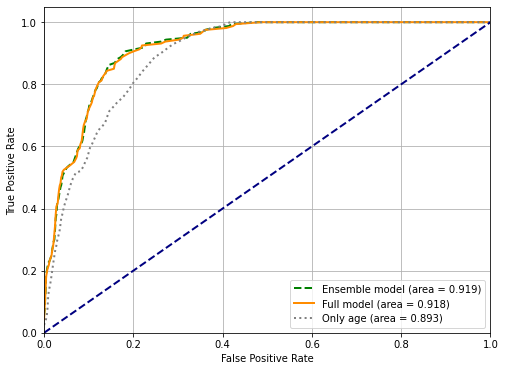

In [176]:
from sklearn.metrics import roc_curve, auc
plt.figure(figsize=(8,6))
lw = 2
plt.plot(fpr_e, tpr_e, color='green',lw=lw, label='Ensemble model (area = %0.3f)' % np.mean(auc_en),linestyle='--')
plt.plot(fpr_fu, tpr_fu, color='darkorange',lw=lw, label='Full model (area = %0.3f)' % np.mean(auc_full))
plt.plot(fpr_ag, tpr_ag, color='grey',lw=lw, label='Only age (area = %0.3f)' % np.mean(auc_age),linestyle=':')
#plt.plot(tpr, fpr, color='red',lw=lw, label='ROC curve (area = %0.2f)' % auc,linestyle='-.')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
#plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.grid()
plt.savefig("ROCs3")
plt.show()

In [174]:
auc_en = np.copy(auc_avg)
tpr_en = np.copy(tprs)
fpr_en = np.copy(fprs)

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


In [126]:
np.mean(auc_age)

0.8933282208588957

In [175]:
all_fpr = np.unique(np.concatenate([fpr_en[i] for i in range(5)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(5):
    mean_tpr += np.interp(all_fpr, fpr_en[i], tpr_en[i])
mean_tpr /= 5
fpr_e = all_fpr
tpr_e = mean_tpr

In [179]:
tpr_e[len(fpr_e)-sum([i>=0.2 for i in fpr_e])]

0.9125

In [181]:
df = pd.read_pickle(f"df_f{0}")

In [185]:
np.sort(df.age_at_event)

array([ 28,  28,  28, ...,  99, 100, 100])